# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
%pip install opendatasets pandas numpy scikit-learn xgboost lightgbm tabulate category_encoders
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
#import some necessary librairies
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["dir", "C:/Users/anirb/aiml/UT-Austin-PGP/input/"]).decode("utf8")) #check the files available in the directory

In [4]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

## Loading the dataset

In [5]:
# Now let's import and put the train and test datasets in  pandas dataframe
folderPath = "."
data = pd.read_csv(folderPath + "/input/BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [6]:
data.shape

(10127, 21)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [8]:
data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



In [9]:
df1 = data.copy()

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    (
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
        if bins
        else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """

    Print the category counts and plot a stacked bar chart


    data: dataframe

    predictor: independent variable

    target: target variable
    """

    count = data[predictor].nunique()

    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)

    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.show()

In [13]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [14]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [15]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [17]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [18]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df1.dtypes[df1.dtypes == "object"].index:
    val_counts = df1[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-------------------------------------------------- 

F    5358
M    4769
Name: Gender, dtype: int64
-------------------------------------------------- 

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-------------------------------------------------- 

Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
-------------------------------------------------- 

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
-------------------------------------------------- 

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------

<Axes: xlabel='Gender', ylabel='Attrition_Flag'>

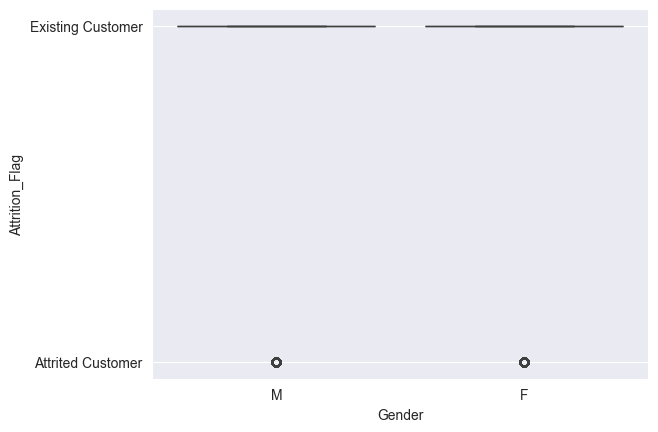

In [19]:
sns.boxplot(x="Gender", y="Attrition_Flag", data=df1)

<Axes: xlabel='Gender', ylabel='Attrition_Flag'>

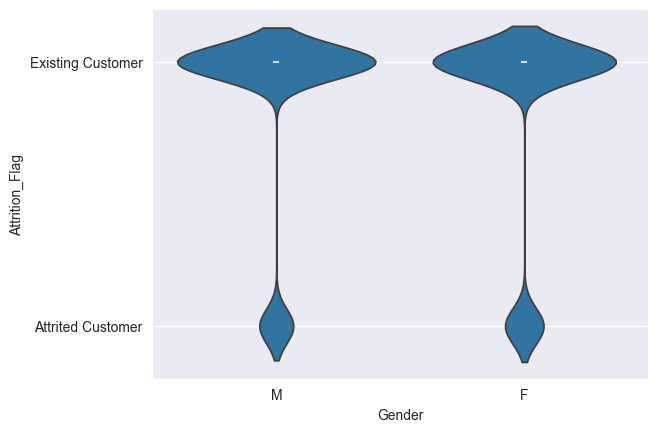

In [20]:
sns.violinplot(data=df1, x="Gender", y="Attrition_Flag")

In [1]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1["Attrition_Flag"] = label_encoder.fit_transform(df1["Attrition_Flag"])
df1["Gender"] = label_encoder.fit_transform(df1["Gender"])
df1["Education_Level"] = label_encoder.fit_transform(df1["Education_Level"])

df1["Marital_Status"] = label_encoder.fit_transform(df1["Marital_Status"])

df1["Income_Category"] = label_encoder.fit_transform(df1["Income_Category"])

df1["Card_Category"] = label_encoder.fit_transform(df1["Card_Category"])

df1["Attrition_Flag"].unique()

NameError: name 'df1' is not defined

###  Univariate Analysis

#### Customer Age

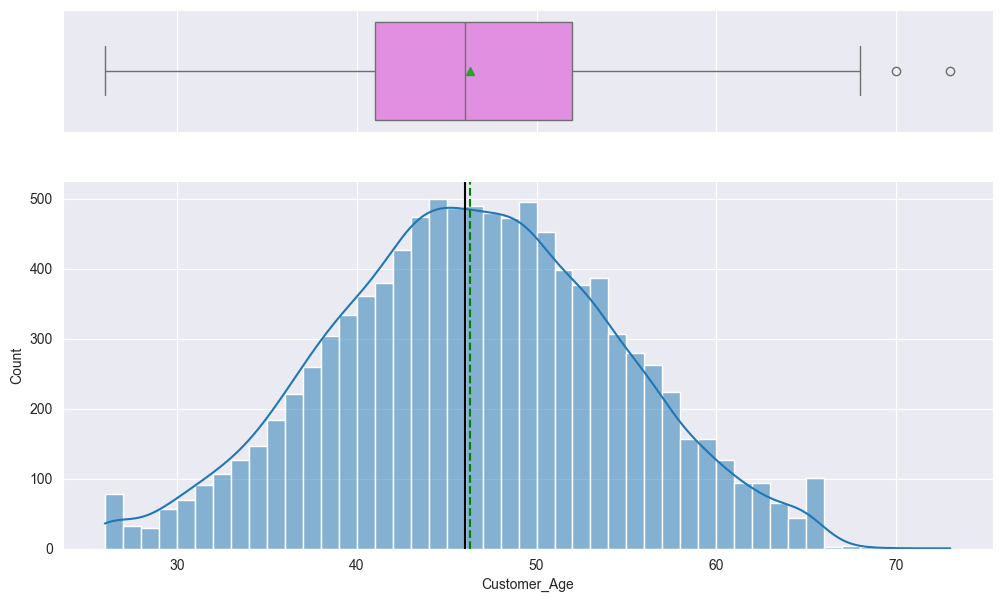

In [22]:
histogram_boxplot(df1, "Customer_Age", kde=True)

Customer Age distribution is normal distributed. So 40-60 age group has the most number of records

In [23]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Months_on_book

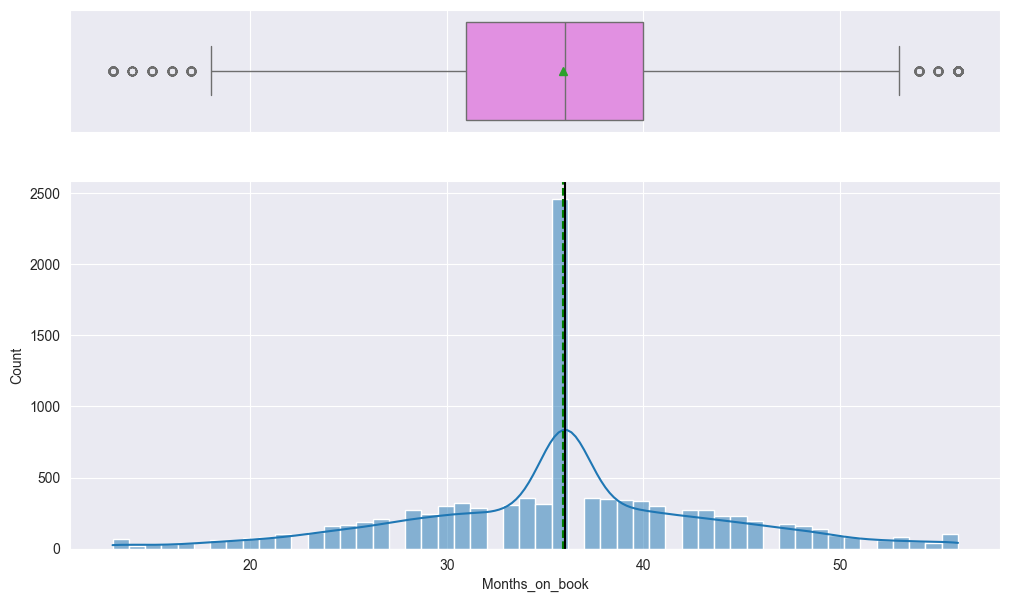

In [24]:
histogram_boxplot(df1, "Months_on_book", kde=True)

Very high number of records for 36 months on book. So  a lot  customers have 36 months relationship with the bank

#### Credit_Limit

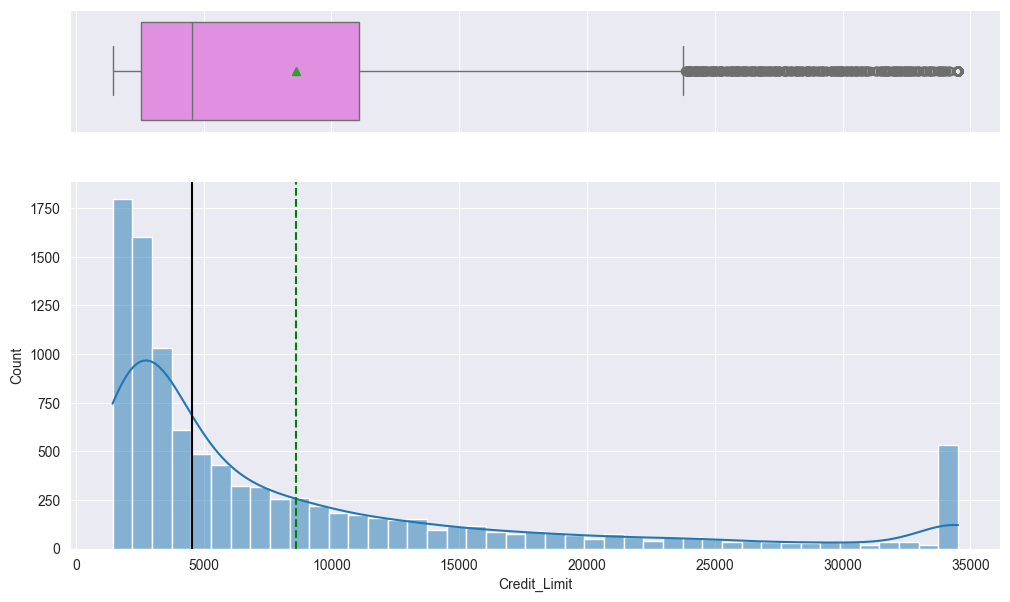

In [25]:
histogram_boxplot(df1, "Credit_Limit", kde=True)

high number of records are for folks with credit limit less than 10k. There are higher end outliers in Credit Limit. This might be because the customers are high end.

#### Total_Revolving_Bal

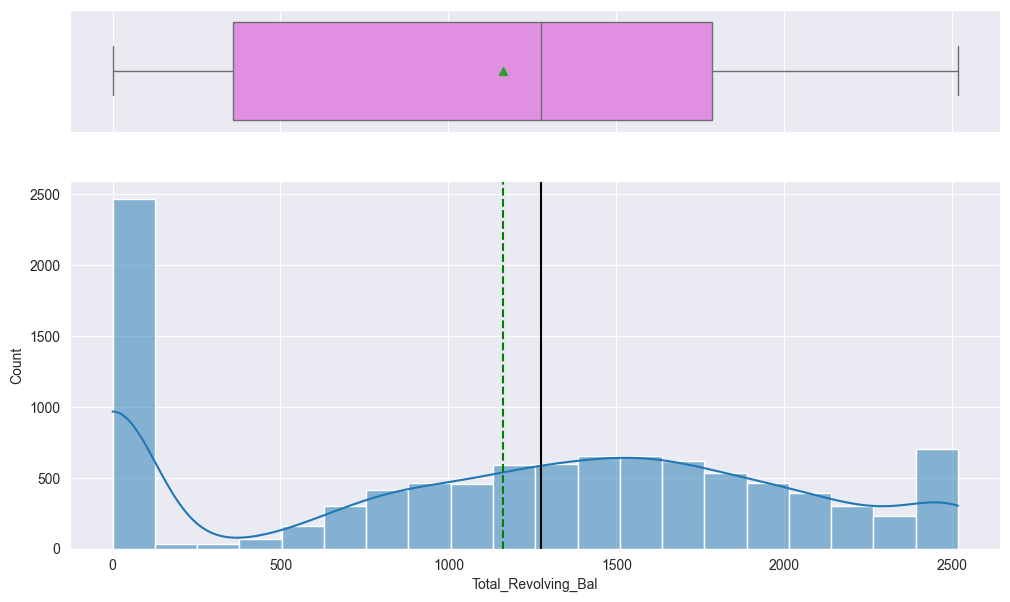

In [26]:
histogram_boxplot(df1, "Total_Revolving_Bal", kde=True)

Most customers keep between 500-2500 Total Revolving Balance,

#### Avg_Open_To_Buy

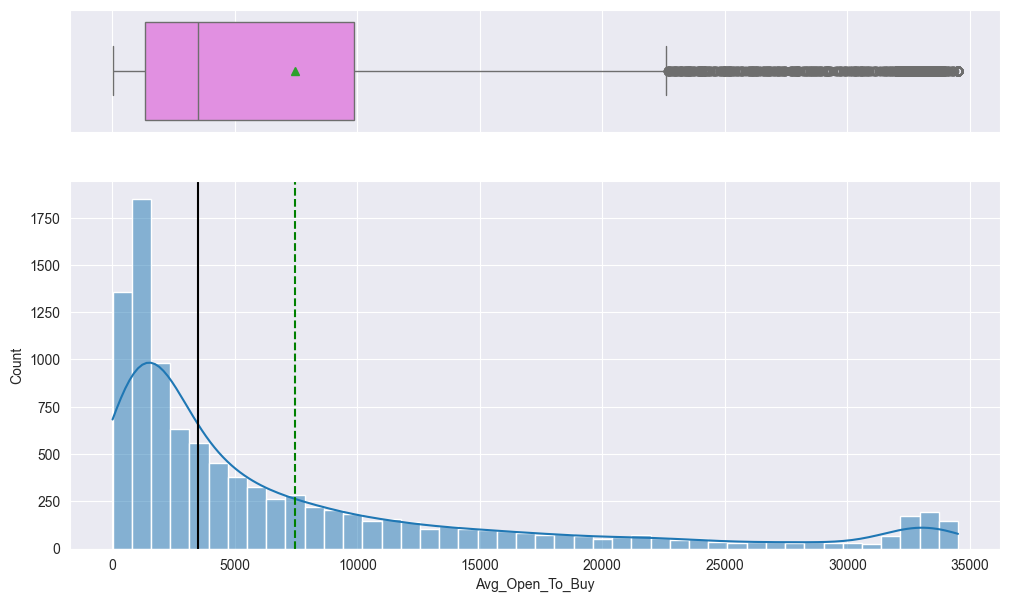

In [27]:
histogram_boxplot(df1, "Avg_Open_To_Buy", kde=True)

Most customers have between 0 to 10000 as Avg Open to Buy


#### Total_Trans_Ct

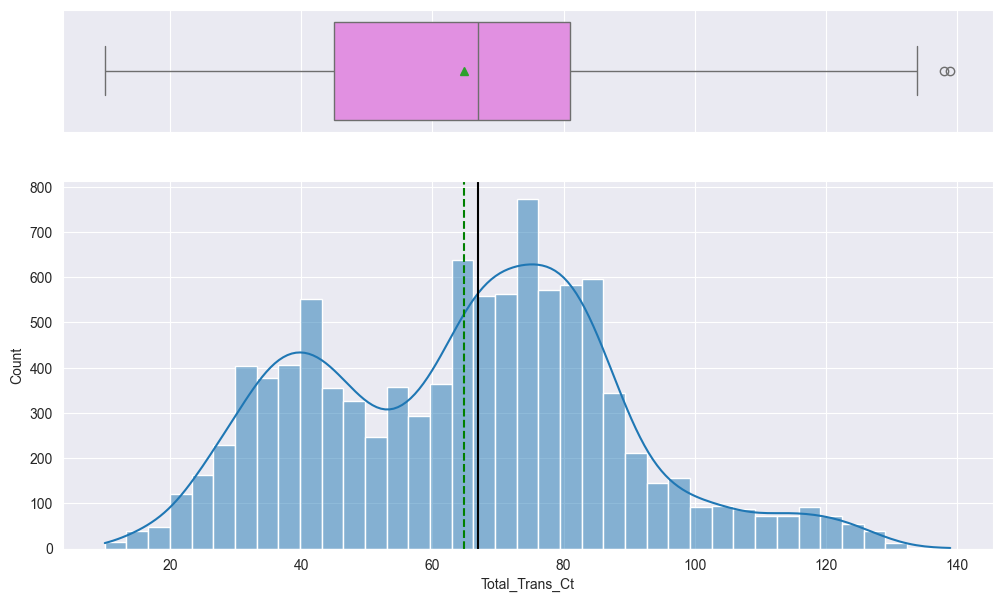

In [28]:
histogram_boxplot(df1, "Total_Trans_Ct", kde=True)

Total Transaction Count has 2 peaks with clusters around 30-50 and 70-90

####### Total_Amt_Chng_Q4_Q1

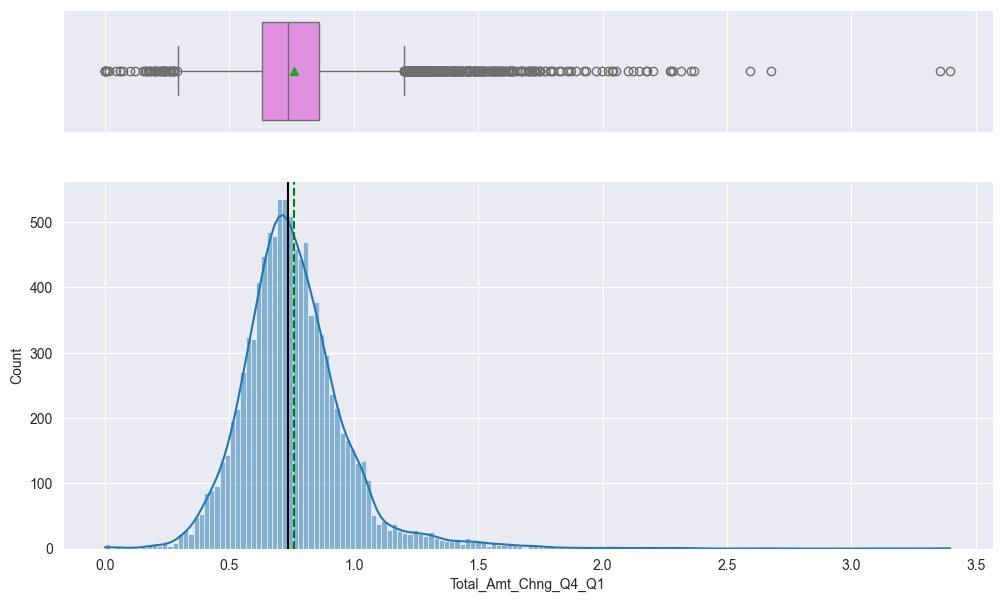

In [29]:
histogram_boxplot(df1, "Total_Amt_Chng_Q4_Q1", kde=True)

Normal distribution around Total Amount Change with quite a few outliers on the right side. That means most folks had between 0-1.5 change in Amount in Q4

#### Total_Trans_Amt

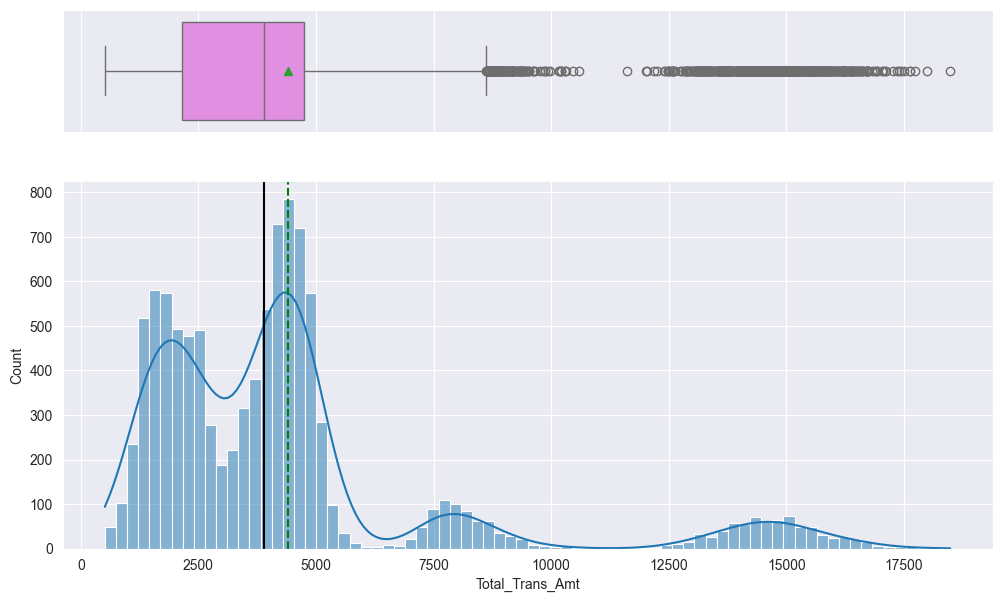

In [30]:
histogram_boxplot(df1, "Total_Trans_Amt", kde=True)

Has 4 distinct distribvutions, betweeen  2500, 5000,8000 and another one around 15k. most records fall within this pattern

#### Avg_Utilization_Ratio

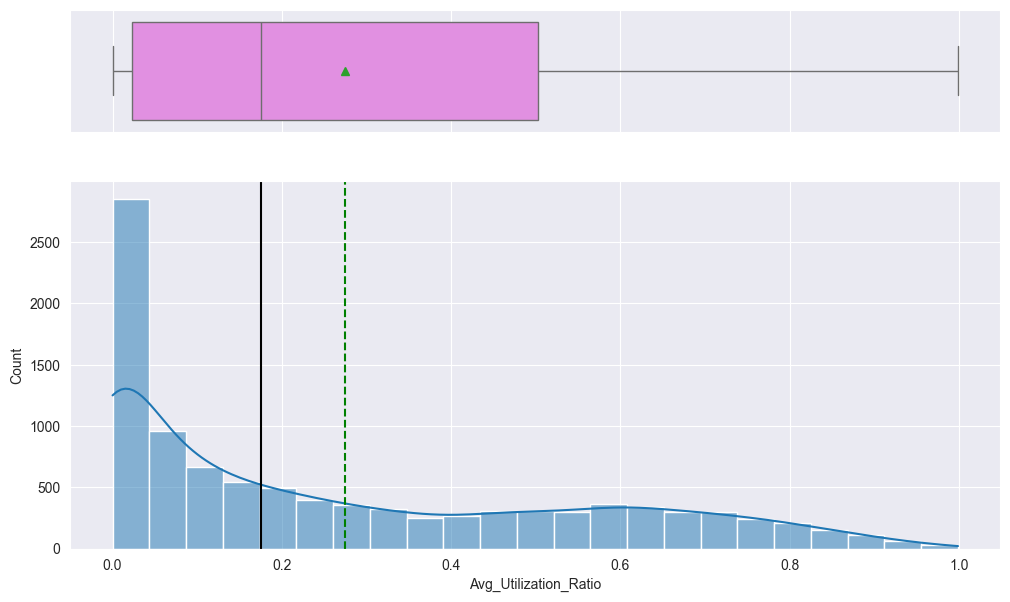

In [31]:
histogram_boxplot(df1, "Avg_Utilization_Ratio", kde=True)

Heavily right skewed data. So most transactions in the data set have low utilization rates

#### Dependent_count

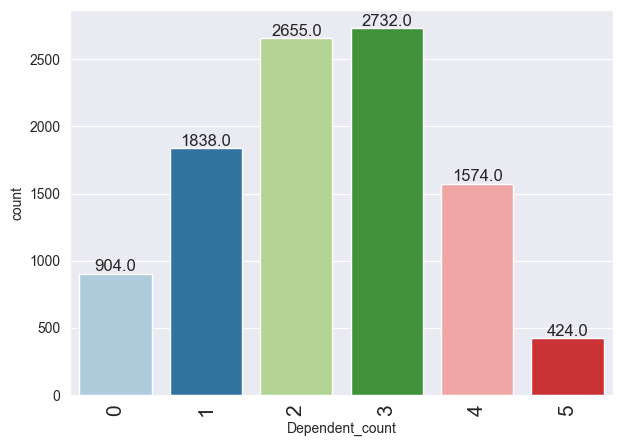

In [32]:
labeled_barplot(df1, "Dependent_count")

data set has more or less even split based on dependent count. Credit cards are mostly used by folks who have more than 0 dependetns 

#### Total_Relationship_Count

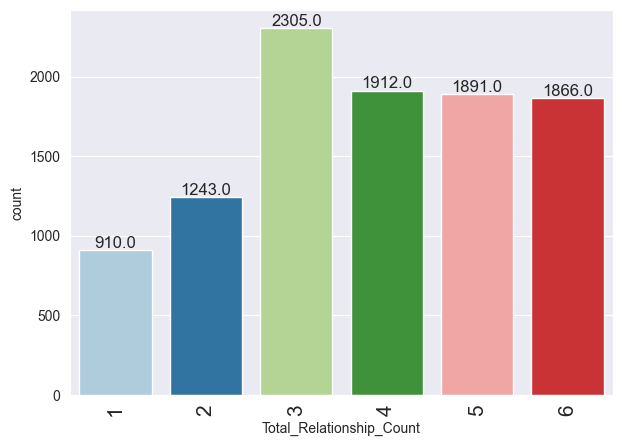

In [33]:
labeled_barplot(df1, "Total_Relationship_Count")

More or less equal split record set between Total count of relationships. Most customers have more than 2 relationshops


#### Months_Inactive_12_mon


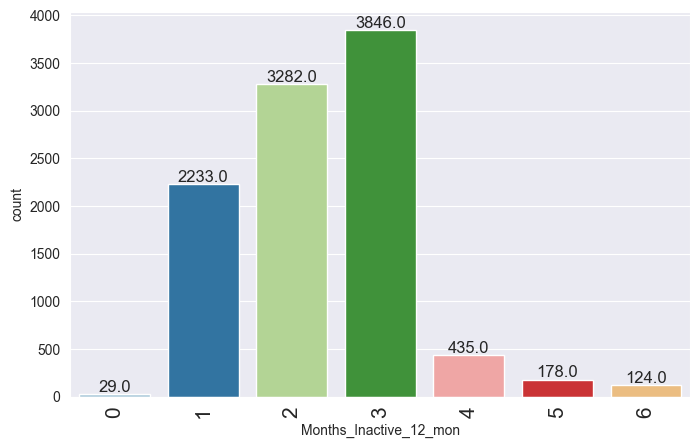

In [34]:
labeled_barplot(df1, "Months_Inactive_12_mon")

#### Contacts_Count_12_mon


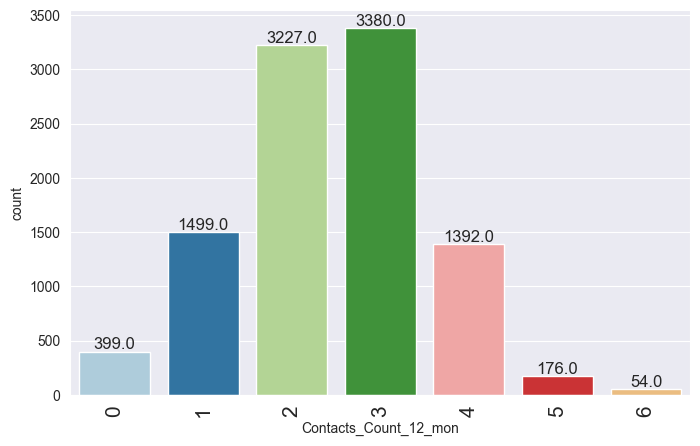

In [35]:
labeled_barplot(df1, "Contacts_Count_12_mon")

#### Gender

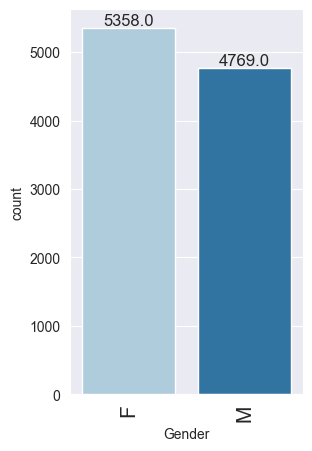

In [36]:
labeled_barplot(data, "Gender")

Nearly Even Split between Genders


#### Education_Level

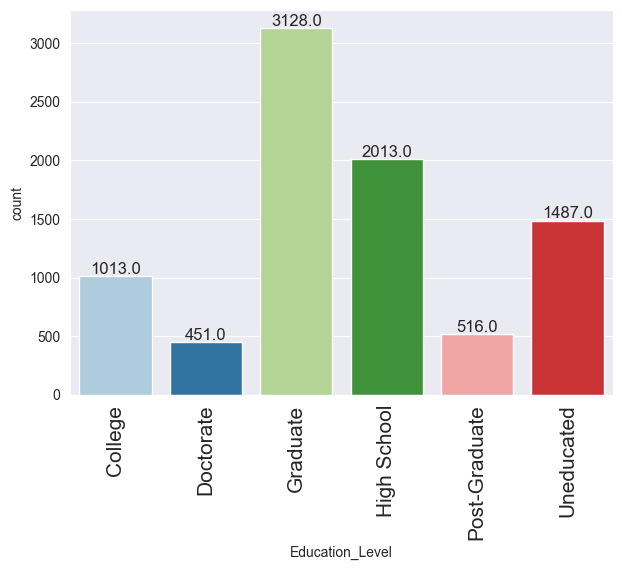

In [37]:
labeled_barplot(data, "Education_Level")

Most Customers are educated with largest %  Graduates


#### Marital_Status

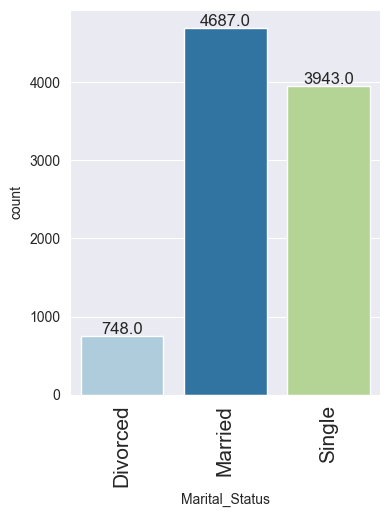

In [38]:
labeled_barplot(data, "Marital_Status")

Nearly even split between Married and Single . A low % are divorced

#### Income_Category

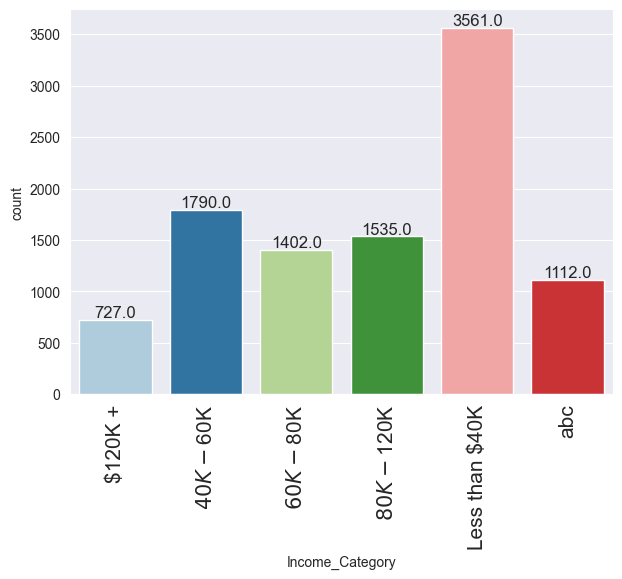

In [39]:
labeled_barplot(data, "Income_Category")

Most customers are less than 120K. 40K income are the highest %age

#### Card_Category

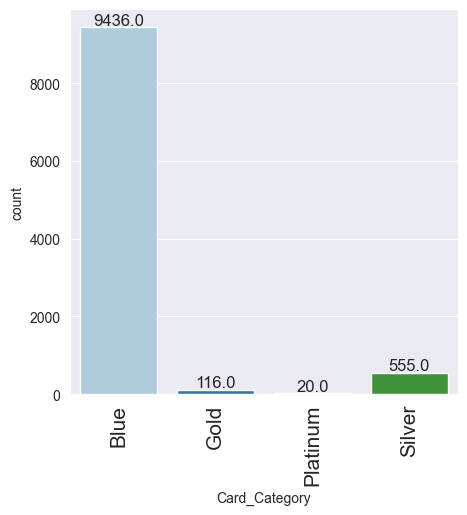

In [40]:
labeled_barplot(data, "Card_Category")

Nearly all customers are Blue Card Cateogry. A very small %age in Silver and Gold.

#### Attrition_Flag

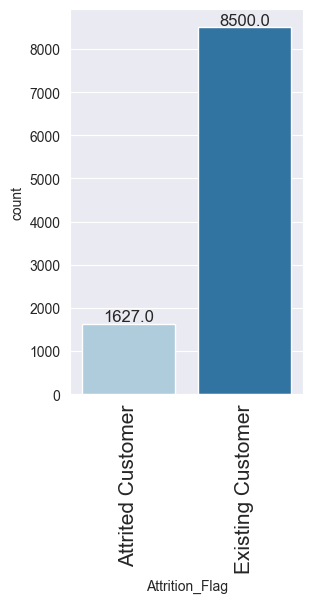

In [41]:
labeled_barplot(data, "Attrition_Flag")

Most customers are Existing Customers and a small %age have Attrited 

### Bivariate Distributions

#### Correl Matrix

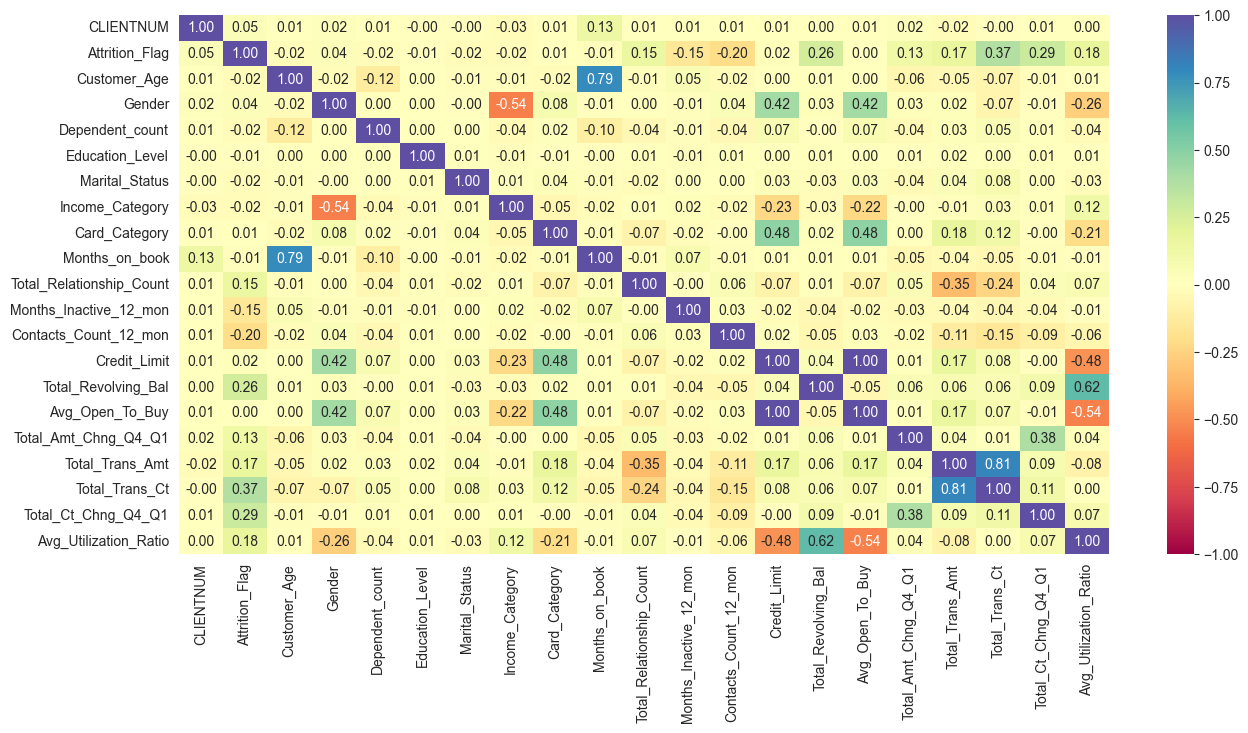

In [42]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
# cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There are strong correlations between
Total Trans Amt and Total Trans Count - which should be clear as number of transactions leads to higher amount.

Credit Limit and AvgOpenToBuy have strong correl. Its primarily because AvgOpenToBuy is the remaining amount from the credit limit

Months on Book and Customer Age have strong correl. With hihger age of the customer they would have the account open for longer 

Total Revolving Balance has high correl with AvgUtilizaitonRation. Mainly because Utilization Ratio is a calculated field based on Revolving Balance and cRedit Limit

#### Gender vs Attrition_Flag

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


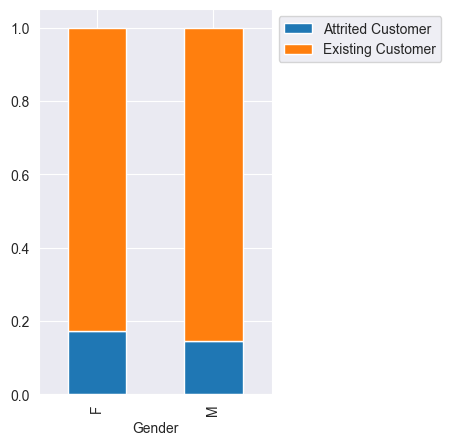

In [43]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Not a lot of difference in Retention based on Gender. Females have slightly higher probabiltiy of Attrition
Attrition does not seem to be related with Gender


#### Education_Level vs Attrition_Flag

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


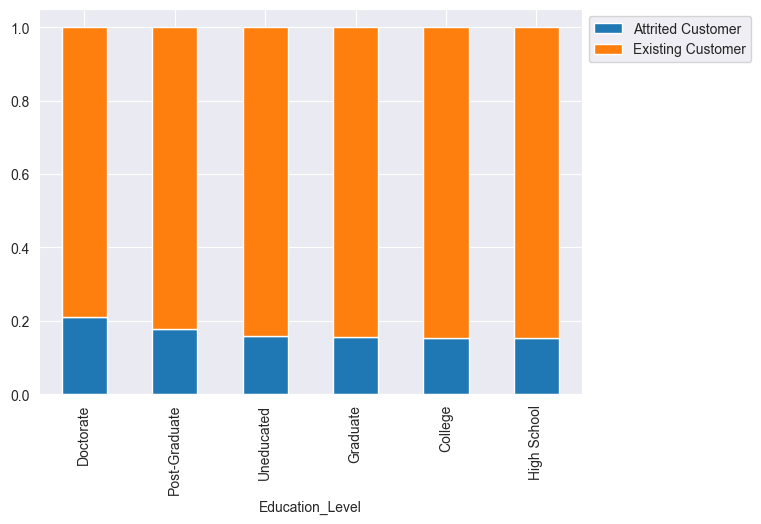

In [44]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

higher the education level higher is the Attrition Rate. but the variation is low.
Attrition does not seem to be related with Education


#### Income_Category vs Attrition_Flag

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


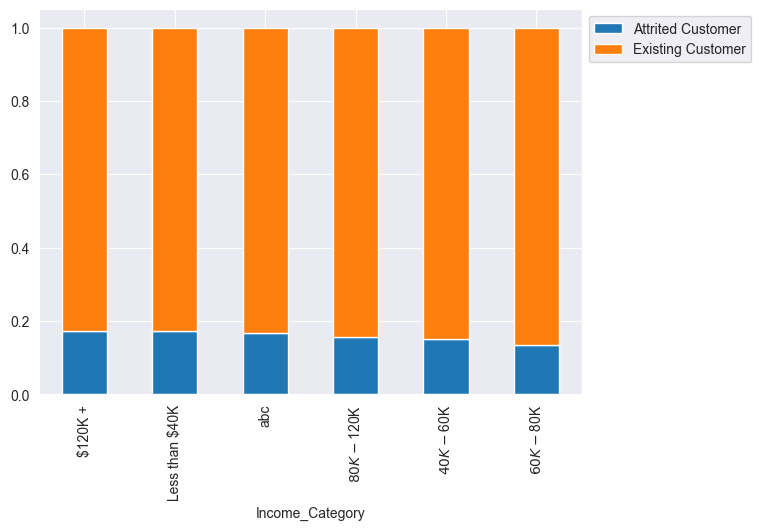

In [45]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Empty Values present in a  good proportion of the dataset
Otherwise the rate of attrition is not varying a lot based on income category
Attrition does not seem to be related with Income Category


#### Contacts_Count_12_mon vs Attrition_Flag

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


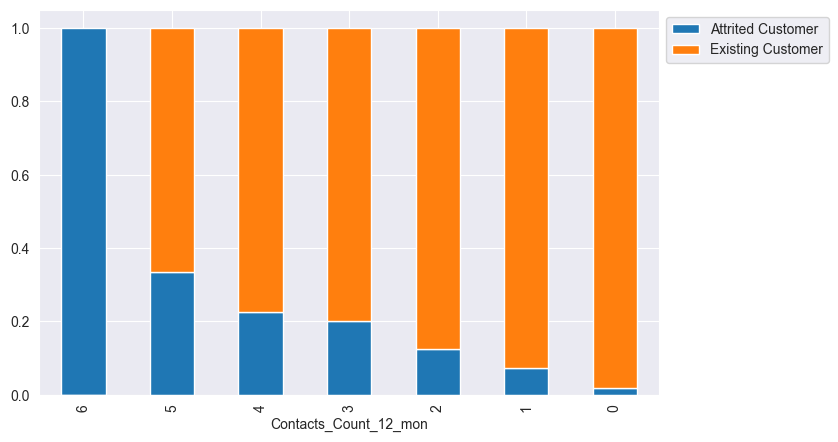

In [46]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

If the number of contacst in the last 6 months is high , the attrition is higher too.
I think this might be related to incoming customer calls requesting customer service. Whcih might be because of problems, issues  or inabiltiy to pay. 
Hence the attrition is higher if the number of touchpoints are higher

#### Months_Inactive_12_mon vs Attrition_Flag

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


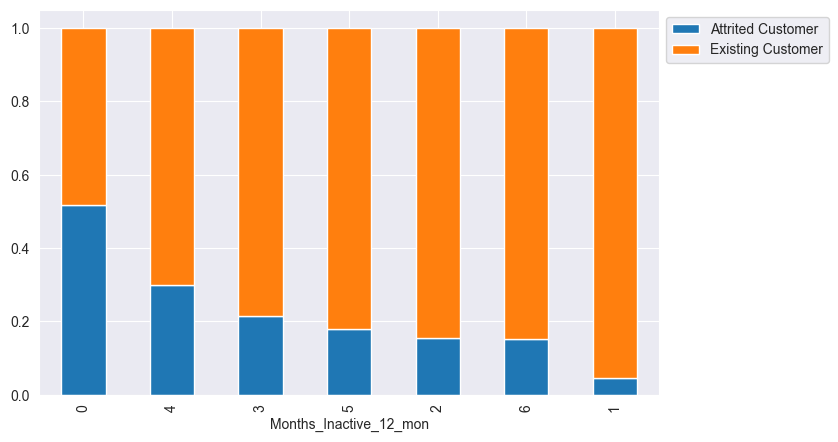

In [47]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition Rates are high if Months inactive is 0. 
It is the lowest if the months the card was inactive is 1


#### Total_Relationship_Count vs Attrition_Flag

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


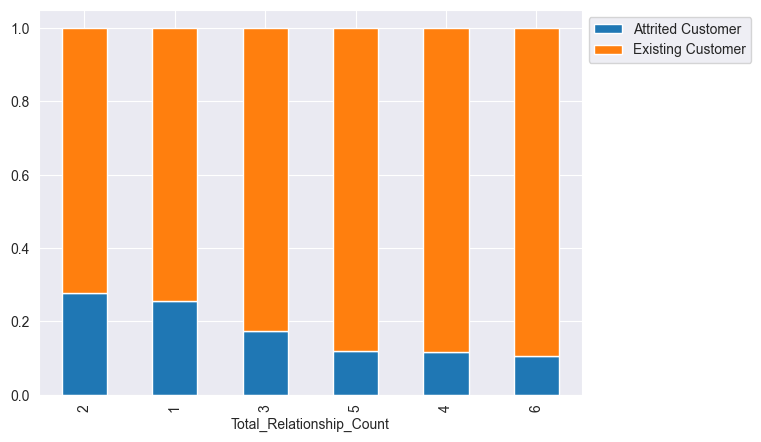

In [48]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

Attrition Rates are lower as the number of Relationships increase. So more account with the bank means less likely to Attrite on the card.

#### Dependent_count vs Attrition_Flag

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


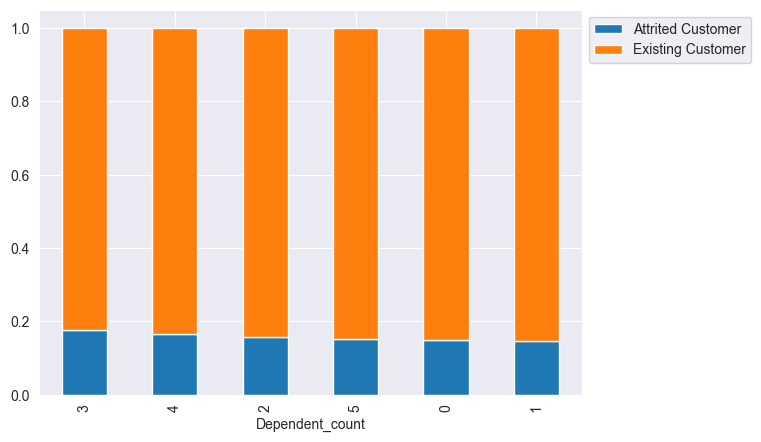

In [49]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

More or less same Attrition Rate regardless of the Dependent Count

#### Total_Revolving_Bal vs Attrition_Flag

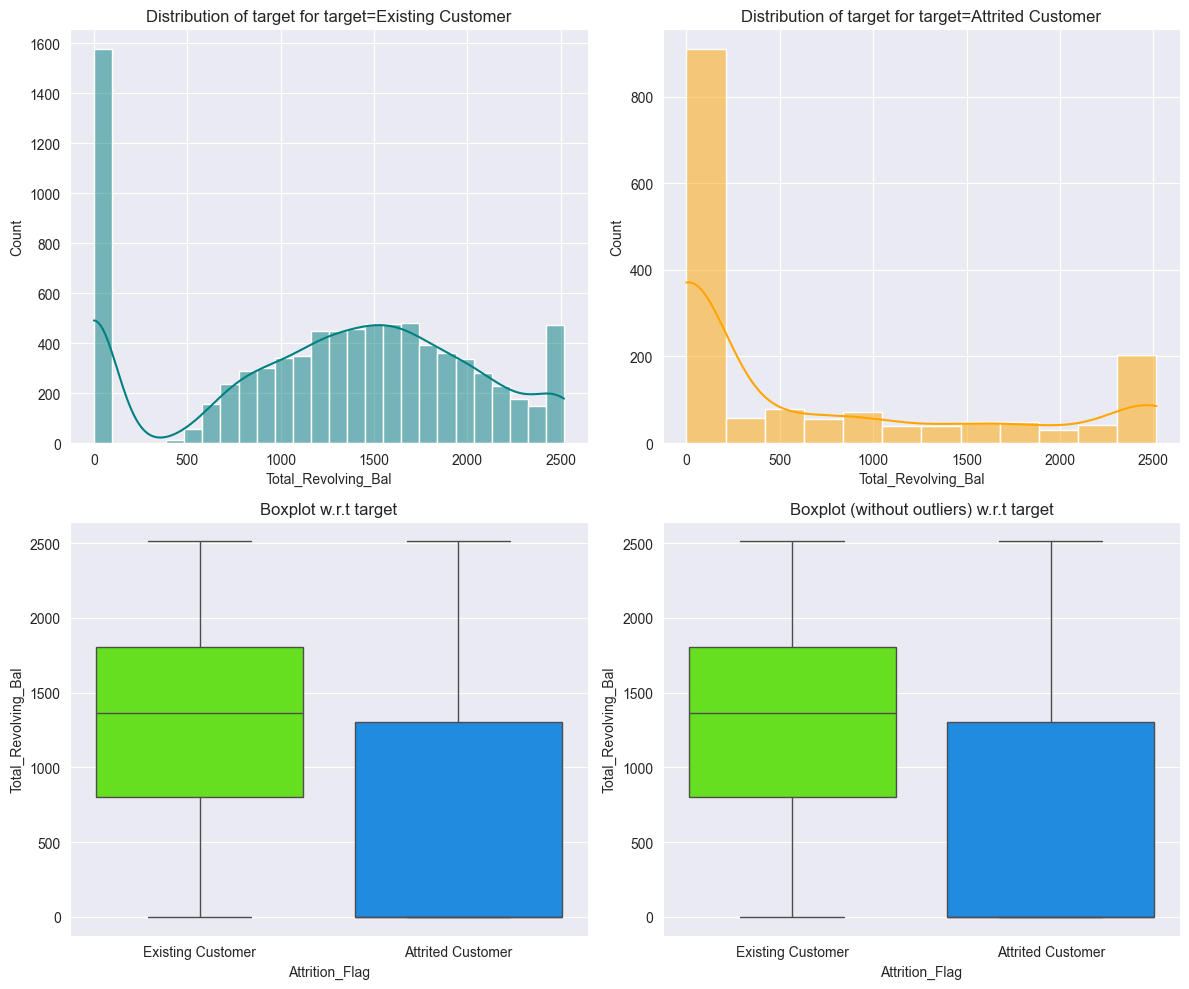

In [50]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#### Customer_Age vs Attrition_Flag

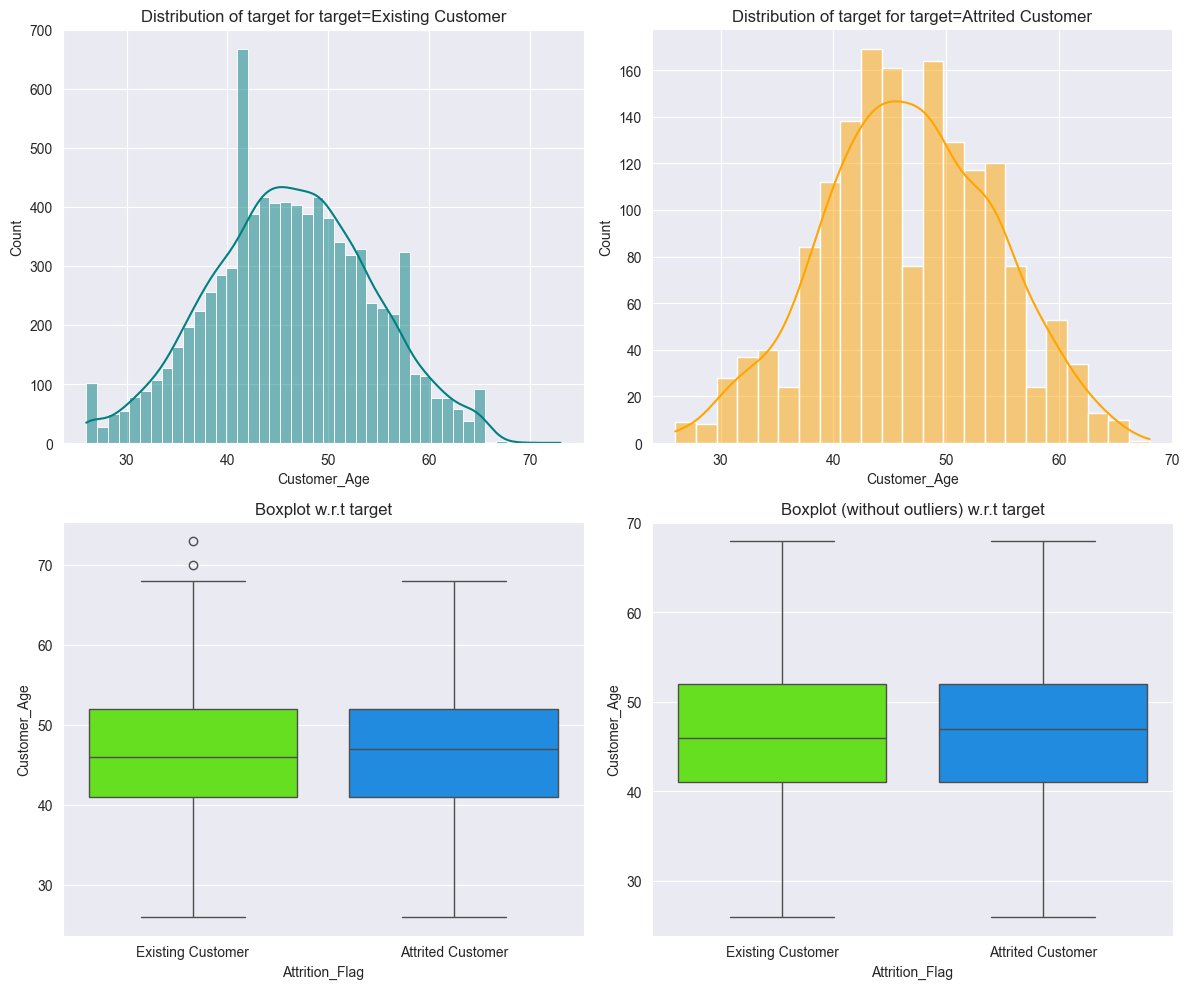

In [51]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

Very normal distribution between Customer Age and Attrition

#### Total_Trans_Ct vs Attrition_Flag

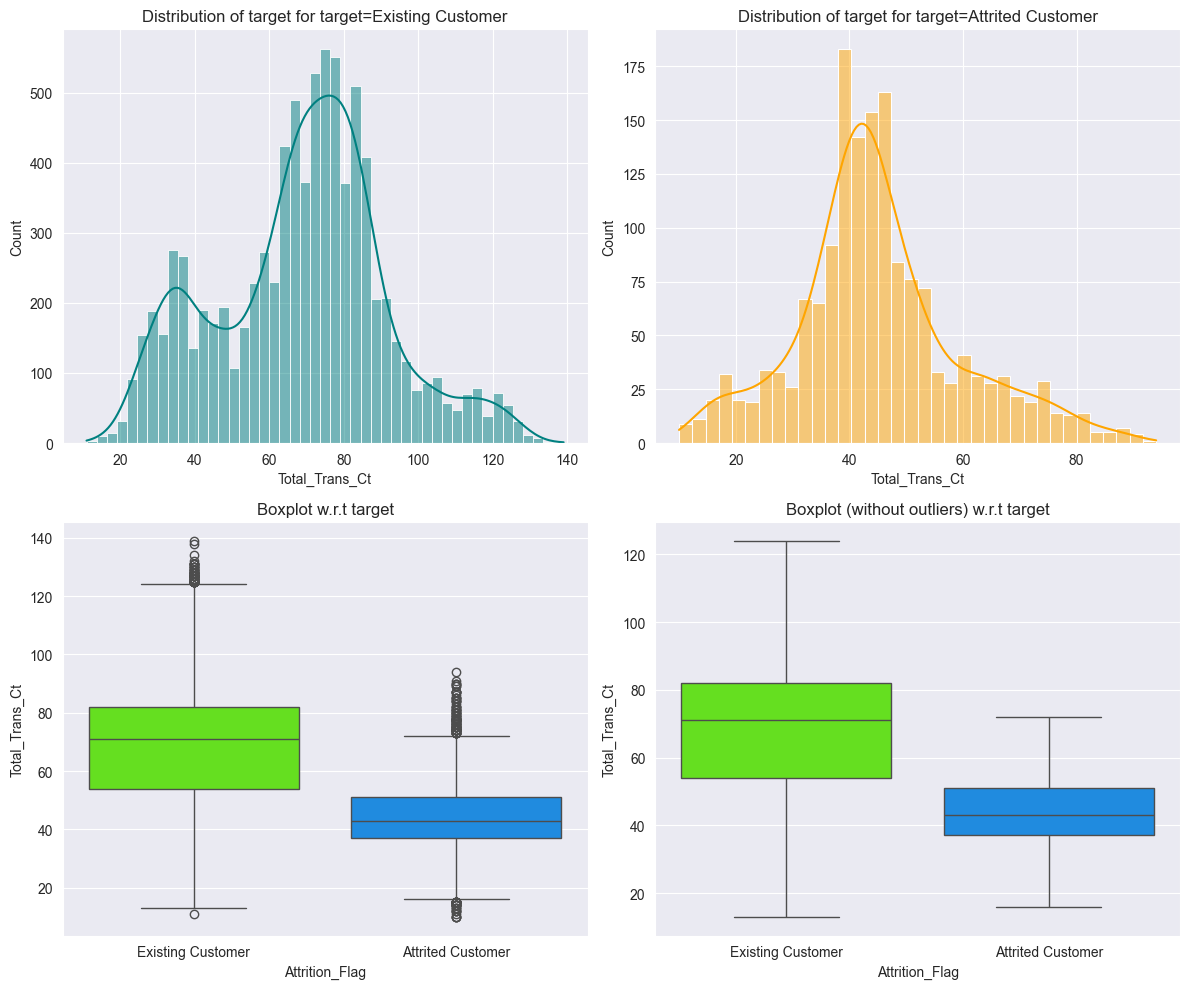

In [52]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

#### Total_Trans_Amt vs Attrition_Flag

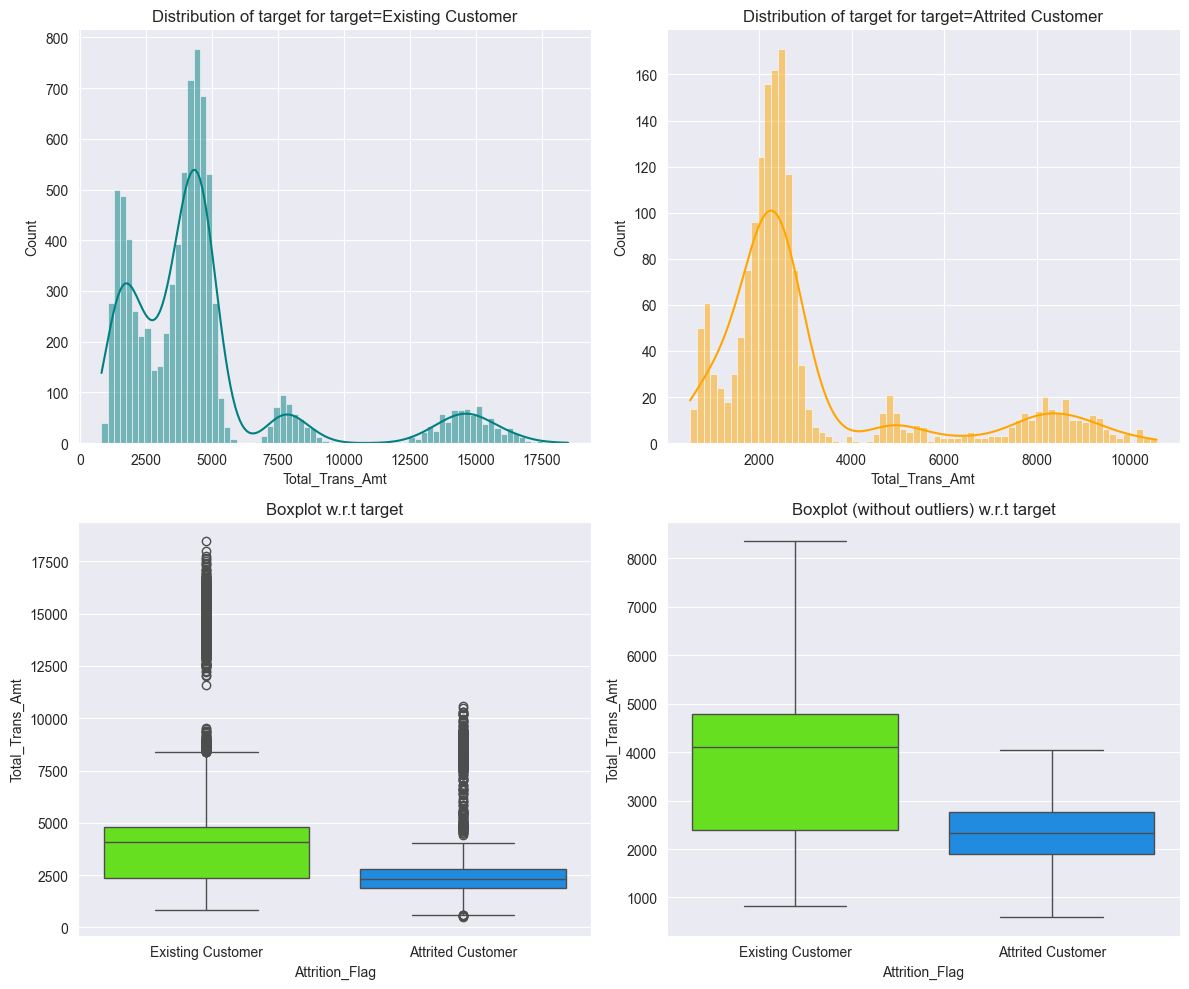

In [53]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

#### Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

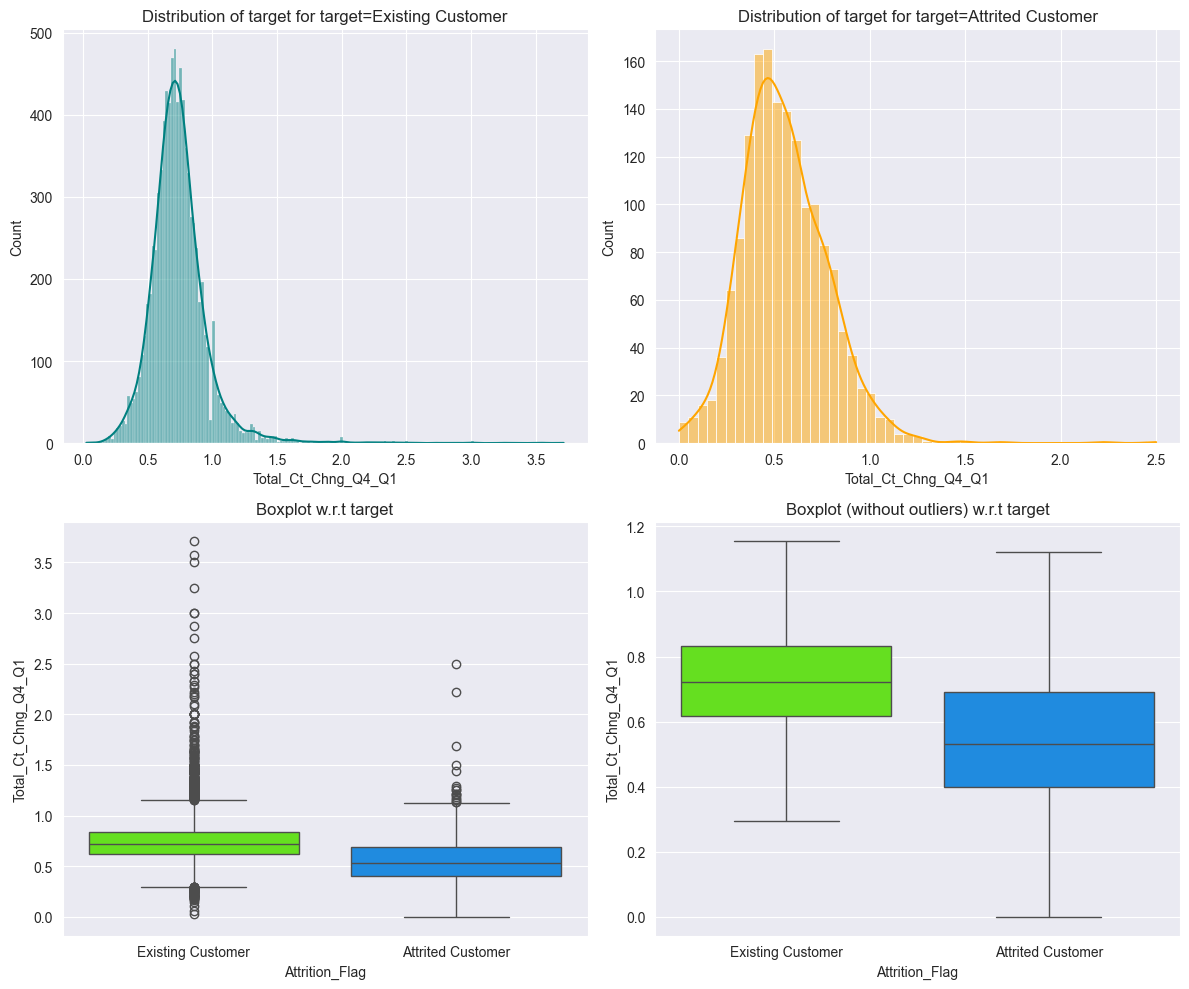

In [54]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#### Avg_Utilization_Ratio vs Attrition_Flag

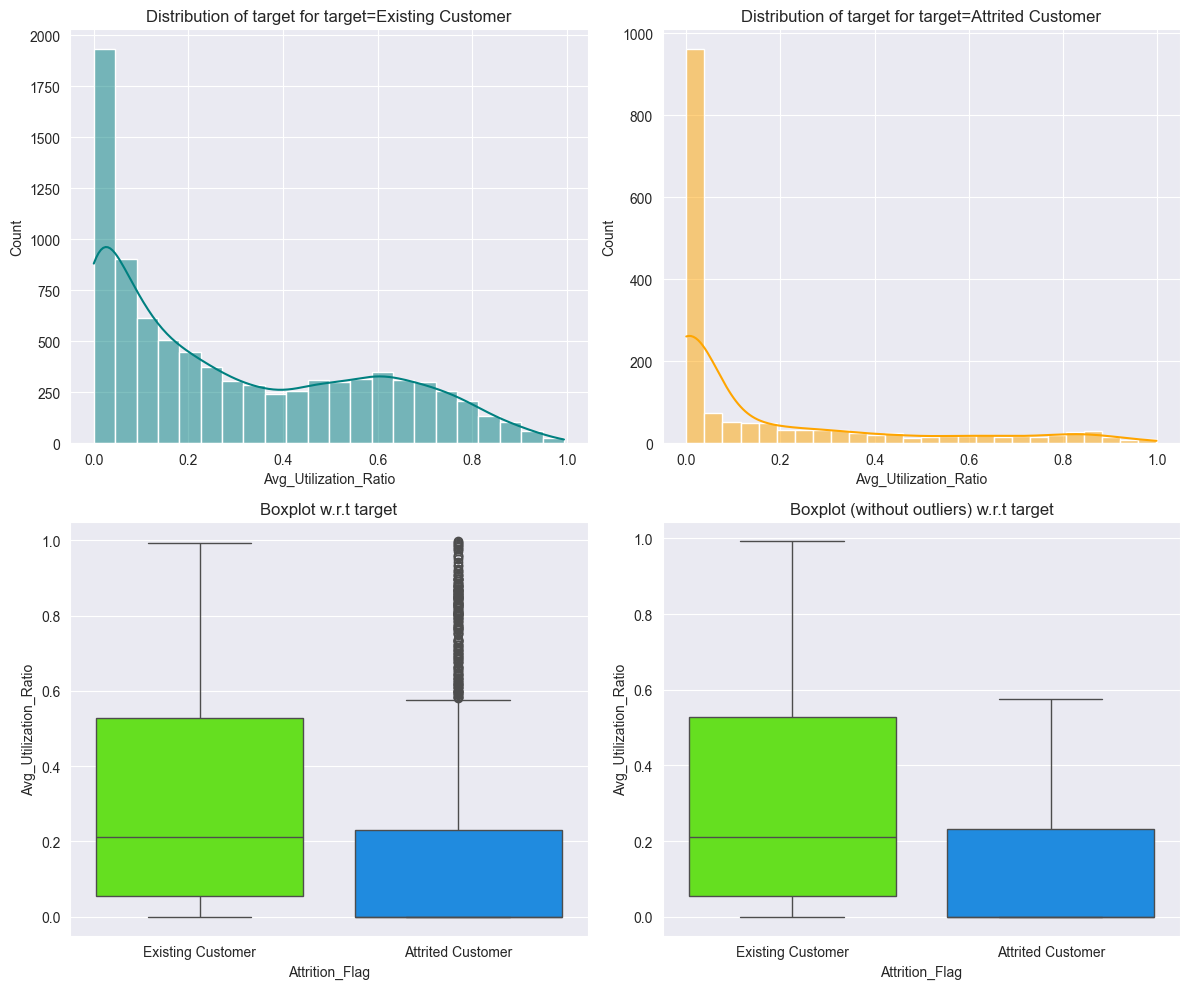

In [55]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

#### Months_on_book vs Attrition_Flag

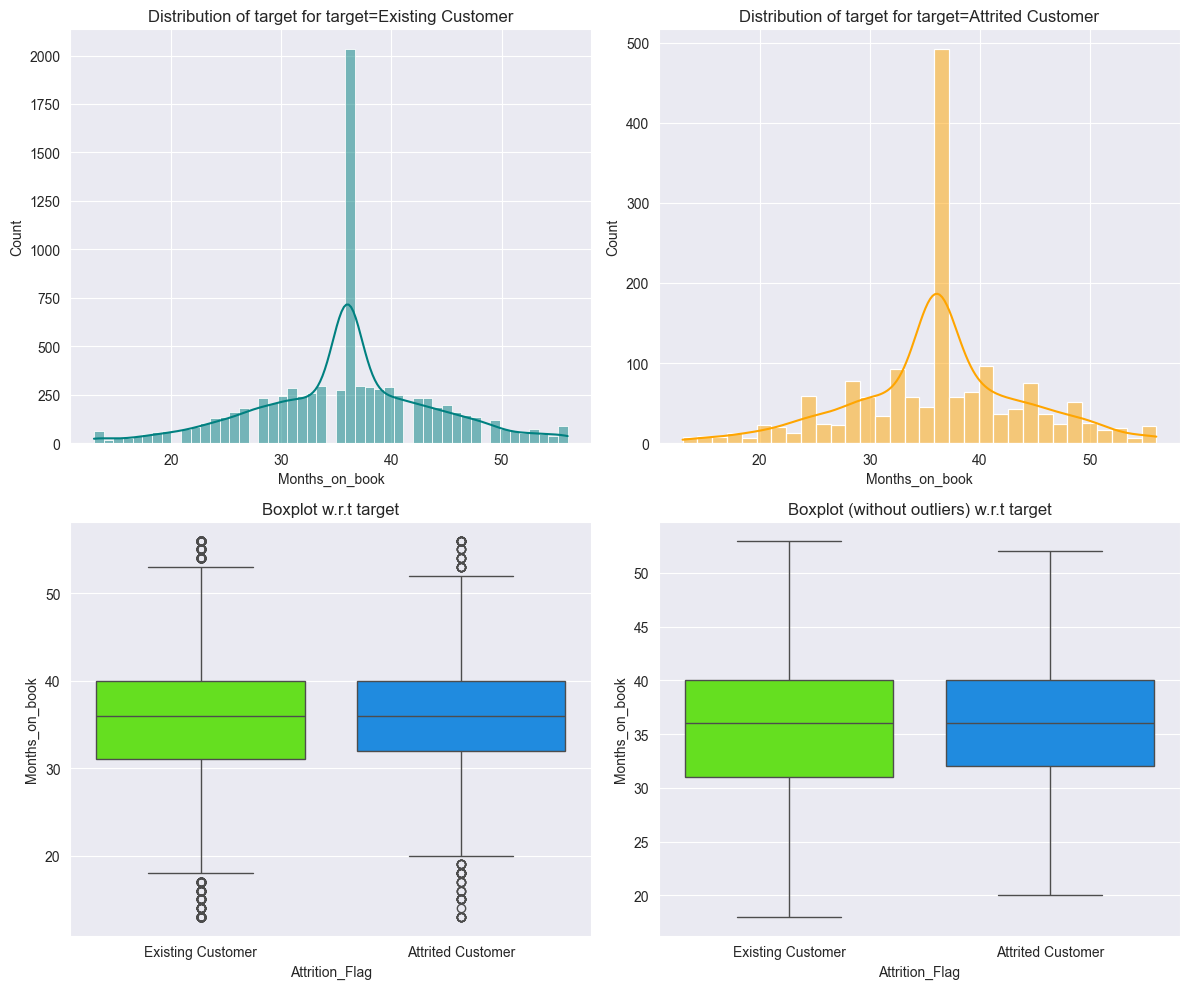

In [56]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

#### Total_Revolving_Bal vs Attrition_Flag

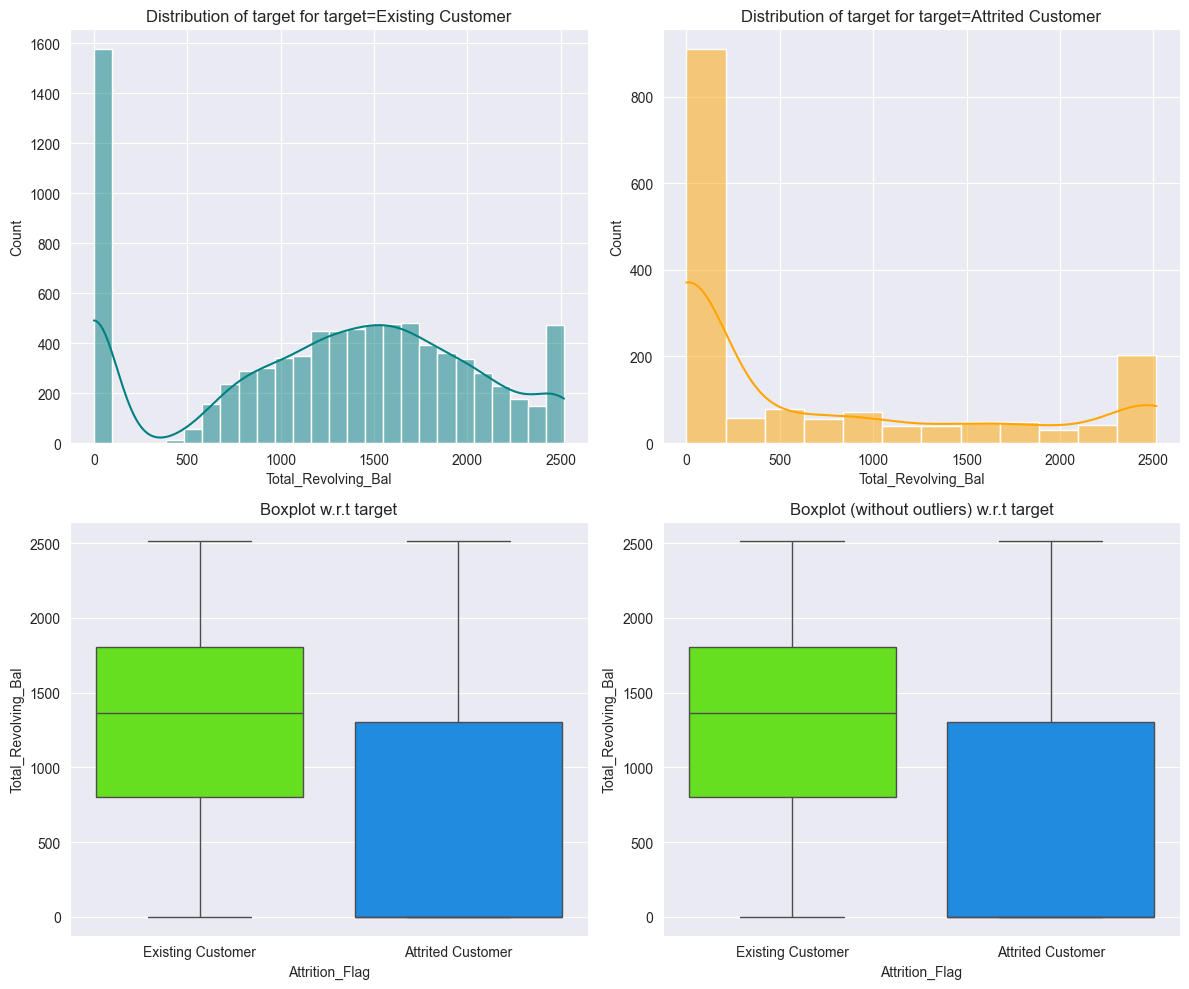

In [57]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#### Avg_Open_To_Buy vs Attrition_Flag

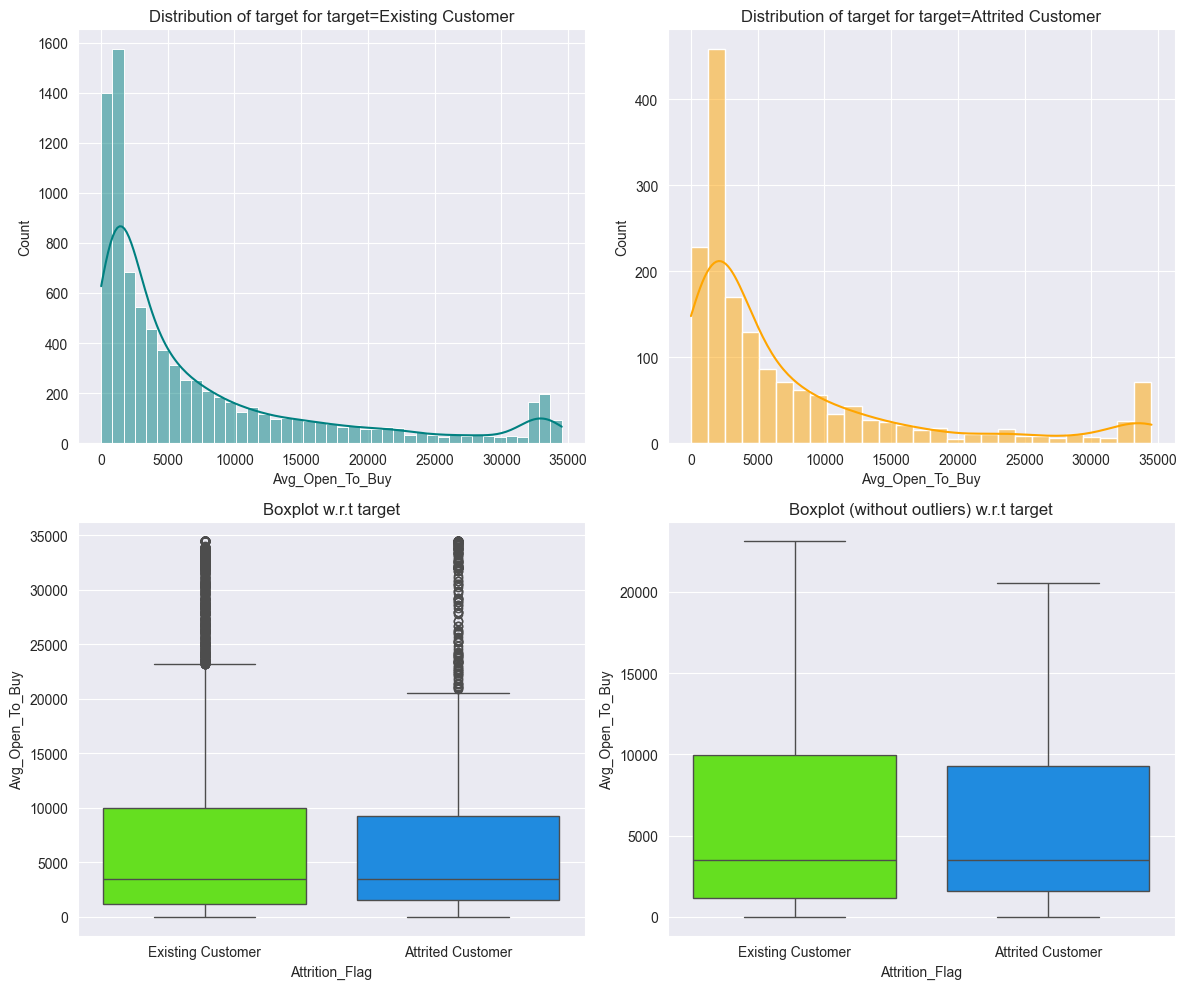

In [58]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

## Data Pre-processing

In [59]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [60]:
# checking the % outliers
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

CLIENTNUM                  0.000
Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

In [61]:
### Train-Test Split
# data1 = data.copy()

In [62]:
data["Income_Category"].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [63]:
data["Income_Category"].replace(
    "abc", np.nan, inplace=True
)  ### complete the code to replace the anomalous values with NaN

In [64]:
data["Marital_Status"].value_counts(dropna=False)

Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64

In [65]:
data["Education_Level"].value_counts(dropna=False)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [66]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [67]:
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

## Missing value imputation




In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

## Feature Engineering

In [69]:
data.drop(["CLIENTNUM"], axis=1, inplace=True) ## Identity Column
data.drop(["Dependent_count"], axis=1, inplace=True) #Strong Correl
data.drop(["Months_on_book"], axis=1, inplace=True)  #Strong Correl
data.drop(["Total_Trans_Ct"], axis=1, inplace=True)  #Strong Correl
data.drop(["Avg_Open_To_Buy"], axis=1, inplace=True)  #Strong Correl
data.drop(["Avg_Utilization_Ratio"], axis=1, inplace=True)  #Strong Correl

In [70]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [71]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(data, test_size=0.2, random_state=42) ## Complete the code to split the data into train test in the ratio 75:25

In [73]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [74]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.fit_transform(
    X_val[reqd_col_for_impute]
)  ## Complete the code to impute missing values in X_val

# Transform the test data
# X_test[reqd_col_for_impute] = '_______' ## Complete the code to impute missing values in X_test

In [75]:
X_val.isna().sum()

Customer_Age                0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

In [76]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4279
M    3822
Name: Gender, dtype: int64
******************************
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64
******************************
Married     4346
Single      3144
Divorced     611
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3701
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
$120K +            588
Name: Income_Category, dtype: int64
******************************
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [77]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(
    X_val, drop_first=True
)  ## Complete the code to impute missing values in X_val
# X_test = '_______'  ## Complete the code to impute missing values in X_val
# print(X_train.shape, X_val.shape, X_test.shape)
# X_test = '_______'  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape)

(8101, 24) (2026, 24)


In [78]:
X_train.head()

,Customer_Age,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Gender_M,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9066,54,1,3,3,3723.000,1728,0.595,8554,0.678,0,...,0,0,1,0,0,0,1,0,0,0
5814,58,1,4,3,5396.000,1803,0.493,2107,0.393,0,...,0,1,0,0,0,0,1,0,0,0
792,45,6,1,3,15987.000,1648,0.732,1436,1.250,0,...,0,0,1,0,0,0,1,1,0,0
1791,34,4,3,4,3625.000,2517,1.158,2616,1.300,0,...,0,0,1,0,0,0,1,0,0,0
5011,49,5,3,4,2720.000,1926,0.602,3806,0.794,0,...,0,1,0,1,0,0,0,0,0,0


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

#### Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [79]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [80]:
# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

### Model Building with original data

In [81]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBClassifier", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9769230769230769
Random forest: 1.0
AdaBoost: 0.7761538461538462
GradientBoost: 0.833076923076923
XGBClassifier: 1.0

Validation Performance:

Bagging: 0.7553516819571865
Random forest: 0.6972477064220184
AdaBoost: 0.672782874617737
GradientBoost: 0.7675840978593272
XGBClassifier: 0.8103975535168195


#### Model Performance Narrative
Looks like the Gradient Boost is giving best results for Recall Score with 83% in Train vs 76% in Validation dataset
XGB seems to be overfitting . 
Adaboost is also looks promising.

We are going to try Oversample and Undersample with these 3 models.

### Model Building with Oversampled data


In [82]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [83]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [84]:
models_oversampled = []  # Empty list to store all the models

# Appending models into the list
models_oversampled.append(("Bagging", BaggingClassifier(random_state=1)))
models_oversampled.append(("Random forest", RandomForestClassifier(random_state=1)))
models_oversampled.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_oversampled.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_oversampled.append(("XGBClassifier", XGBClassifier(random_state=1)))


print("\n" "Training Performance: Oversampled" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance: Oversampled" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance: Oversampled

Bagging: 0.9930769230769231
Random forest: 1.0
AdaBoost: 0.8430769230769231
GradientBoost: 0.9007692307692308
XGBClassifier: 1.0

Validation Performance: Oversampled

Bagging: 0.8042813455657493
Random forest: 0.7614678899082569
AdaBoost: 0.8134556574923547
GradientBoost: 0.8318042813455657
XGBClassifier: 0.8318042813455657


#### Model Comparision
With Oversampling 
Bagging : Overall decrease
Random Forest : Increase in Validation
AdaBoost : Drop in Training, Drop in Validation
Gradient Boost : Drop in Training, Better in Validation. overall better recall
XGB: Not a lot of difference

### Model Building with Undersampled data

In [85]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [86]:
models_undersampled = []  # Empty list to store all the models

# Appending models into the list
models_undersampled.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_undersampled.append(
    ("GradientBoost", GradientBoostingClassifier(random_state=1))
)
models_undersampled.append(("XGBClassifier", XGBClassifier(random_state=1)))


print("\n" "Training Performance: Undersampled" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance: Undersampled" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance: Undersampled

Bagging: 0.9946153846153846
Random forest: 1.0
AdaBoost: 0.9323076923076923
GradientBoost: 0.963076923076923
XGBClassifier: 1.0

Validation Performance: Undersampled

Bagging: 0.9021406727828746
Random forest: 0.8990825688073395
AdaBoost: 0.9021406727828746
GradientBoost: 0.9235474006116208
XGBClassifier: 0.9327217125382263


#### Model Comparision
With Undersampling 
Bagging : Overall decrease
Random Forest : Increase in Validation
AdaBoost : Improvement in Training, Imrrovement in Validation. Overall Much Better recall
Gradient Boost : Improvement in Training, Imrrovement in Validation. overall Much Better recall
XGB: Improvement in Validation

#### Model Choice
So we are going to choose 
Adaboost
XGB
Gradient Boost 
All of them with Undersampled Data for further processing

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Decision Tree

##### original data

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
scorer = metrics.make_scorer(metrics.recall_score)

In [89]:
%%time
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.6269230769230769:
CPU times: total: 812 ms
Wall time: 1.89 s


#####  oversampled data

In [90]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8825149111812248:


#####  undersampled data

In [91]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.873076923076923:


#### Adaboost

##### Undersampled

In [92]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9384615384615385:
CPU times: total: 203 ms
Wall time: 3.44 s


In [93]:
# Creating new pipeline with best parameters
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=75,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)  ## Complete the code with the best parameters obtained from tuning

tuned_adb_un.fit(
    X_train_un, y_train_un
)  ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [94]:
adb_train_un = model_performance_classification_sklearn(
    tuned_adb_un, X_train_un, y_train_un
)  ## Complete the code to check the performance on training set
adb_train_un

,Accuracy,Recall,Precision,F1
0,0.976,0.976,0.975,0.976


In [95]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(
    tuned_adb_un, X_val, y_val
)  ## Complete the code to check the performance on validation set
adb_val_un

,Accuracy,Recall,Precision,F1
0,0.931,0.924,0.724,0.812


##### Hyperparameter Tuned Adaboost
Undersampled recall is pretty good.

##### original data

In [96]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8253846153846155:
CPU times: total: 516 ms
Wall time: 8.72 s


In [97]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)  ## Complete the code with the best parameters obtained from tuning

tuned_adb.fit(X_train, y_train)  ## Complete the code to fit the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [98]:
adb_train = model_performance_classification_sklearn(
    tuned_adb, X_train, y_train
)  ## Complete the code to check the performance on training set
adb_train

,Accuracy,Recall,Precision,F1
0,0.976,0.888,0.956,0.921


In [99]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(
    tuned_adb, X_val, y_val
)  ## Complete the code to check the performance on validation set
adb_val

,Accuracy,Recall,Precision,F1
0,0.952,0.795,0.897,0.843


##### Hyperparameter Tuned Adaboost
Original recall is worse than Undersampled

#### XGBoost

##### Original data

In [100]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9223076923076924:
CPU times: total: 1.39 s
Wall time: 3.47 s


In [101]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=75,
    learning_rate=0.05,
    gamma=3,
)  ## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [102]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.968,0.981,0.846,0.908


In [103]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.942,0.911,0.770,0.835


##### Undersampled data

In [104]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9976923076923077:
CPU times: total: 1.17 s
Wall time: 1.97 s


In [105]:
tuned_xgb_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)  ## Complete the code with the best parameters obtained from tuning

tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [106]:
xgb_train_un = model_performance_classification_sklearn(
    tuned_xgb, X_train_un, y_train_un
)
xgb_train_un

,Accuracy,Recall,Precision,F1
0,0.975,0.981,0.970,0.976


In [107]:
xgb_val_un = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val_un

,Accuracy,Recall,Precision,F1
0,0.942,0.911,0.770,0.835


##### Hyperparameter Tuned XGBoost
Original recall is worse than Undersampled

#### Gradient Boost

##### Original Data

In [108]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7730769230769231:
CPU times: total: 1.42 s
Wall time: 12.3 s


In [109]:
# Creating new pipeline with best parameters
tuned_gb = GradientBoostingClassifier(
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)  ## Complete the code with the best parameters obtained from tuning

tuned_gb.fit(X_train, y_train)  ## Complete the code to fit the model on original data

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, subsample=0.9)

In [110]:
gb_train = model_performance_classification_sklearn(
    tuned_gb, X_train, y_train
)  ## Complete the code to check the performance on training set
gb_train

,Accuracy,Recall,Precision,F1
0,0.964,0.821,0.946,0.879


In [111]:
gb_val = model_performance_classification_sklearn(tuned_gb, X_val, y_val)
gb_val

,Accuracy,Recall,Precision,F1
0,0.944,0.734,0.899,0.808


##### Undersampled Data

In [112]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9415384615384615:
CPU times: total: 344 ms
Wall time: 5.1 s


In [113]:
# Creating new pipeline with best parameters
tuned_gb_un = GradientBoostingClassifier(
    subsample=0.9,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)  ## Complete the code with the best parameters obtained from tuning

tuned_gb_un.fit(
    X_train_un, y_train_un
)  ## Complete the code to fit the model on original data

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, subsample=0.9)

In [114]:
gb_train_un = model_performance_classification_sklearn(
    tuned_gb_un, X_train_un, y_train_un
)  ## Complete the code to check the performance on training set
gb_train_un

,Accuracy,Recall,Precision,F1
0,0.958,0.961,0.956,0.958


In [115]:
gb_val_un = model_performance_classification_sklearn(
    tuned_gb_un, X_val, y_val
)  ## Complete the code to check the performance on training set
gb_val_un

,Accuracy,Recall,Precision,F1
0,0.928,0.927,0.713,0.806


## Model Comparison and Final Model Selection

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_train.T,
        adb_train.T,
        gb_train.T,
        xgb_train_un.T,
        adb_train_un.T,
        gb_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGB Original Train",
    "AdaBoost Original Train",
    "GradientBoost Original Train",
    "XGB Undersampled Train",
    "AdaBoost Undersampled Train",
    "GradientBoost Undersampled Train",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGB Original Train,AdaBoost Original Train,GradientBoost Original Train,XGB Undersampled Train,AdaBoost Undersampled Train,GradientBoost Undersampled Train
Accuracy,0.968,0.976,0.964,0.975,0.976,0.958
Recall,0.981,0.888,0.821,0.981,0.976,0.961
Precision,0.846,0.956,0.946,0.970,0.975,0.956
F1,0.908,0.921,0.879,0.976,0.976,0.958


In [117]:
# Train Val performance comparison

models_train_val_comp_df = pd.concat(
    [
        xgb_train.T,
        xgb_val.T,
        xgb_train_un.T,
        xgb_val_un.T,
        gb_train.T,
        gb_val.T,
        gb_train_un.T,
        gb_val_un.T,
        adb_train.T,
        adb_val.T,
        adb_train_un.T,
        adb_val_un.T,
    ],
    axis=1,
)
models_train_val_comp_df.columns = [
    "XGB Original Train",
    "XGB Original Val",
    "XGB Undersampled Train",
    "XGB Undersampled Val",
    "GradientBoost Original Train",
    "GradientBoost Original Val",
    "GradientBoost Undersampled Train",
    "GradientBoost Undersampled Val",
    "AdaBoost Original Train",
    "AdaBoost Original Val",
    "AdaBoost Undersampled Train",
    "AdaBoost Undersampled Val",
]
print("Train Validation performance comparison:")
models_train_val_comp_df

Train Validation performance comparison:


,XGB Original Train,XGB Original Val,XGB Undersampled Train,XGB Undersampled Val,GradientBoost Original Train,GradientBoost Original Val,GradientBoost Undersampled Train,GradientBoost Undersampled Val,AdaBoost Original Train,AdaBoost Original Val,AdaBoost Undersampled Train,AdaBoost Undersampled Val
Accuracy,0.968,0.942,0.975,0.942,0.964,0.944,0.958,0.928,0.976,0.952,0.976,0.931
Recall,0.981,0.911,0.981,0.911,0.821,0.734,0.961,0.927,0.888,0.795,0.976,0.924
Precision,0.846,0.770,0.970,0.770,0.946,0.899,0.956,0.713,0.956,0.897,0.975,0.724
F1,0.908,0.835,0.976,0.835,0.879,0.808,0.958,0.806,0.921,0.843,0.976,0.812


### Best Model is AdaBoost  Undersampled
We find that Recall Scores are best for ADA Boost With Undersampled at .942 for Val vs .970 for Train.
The recalls scores are not only high but also closest between train and val datasets out of all the otehr models.

### Test set final performance

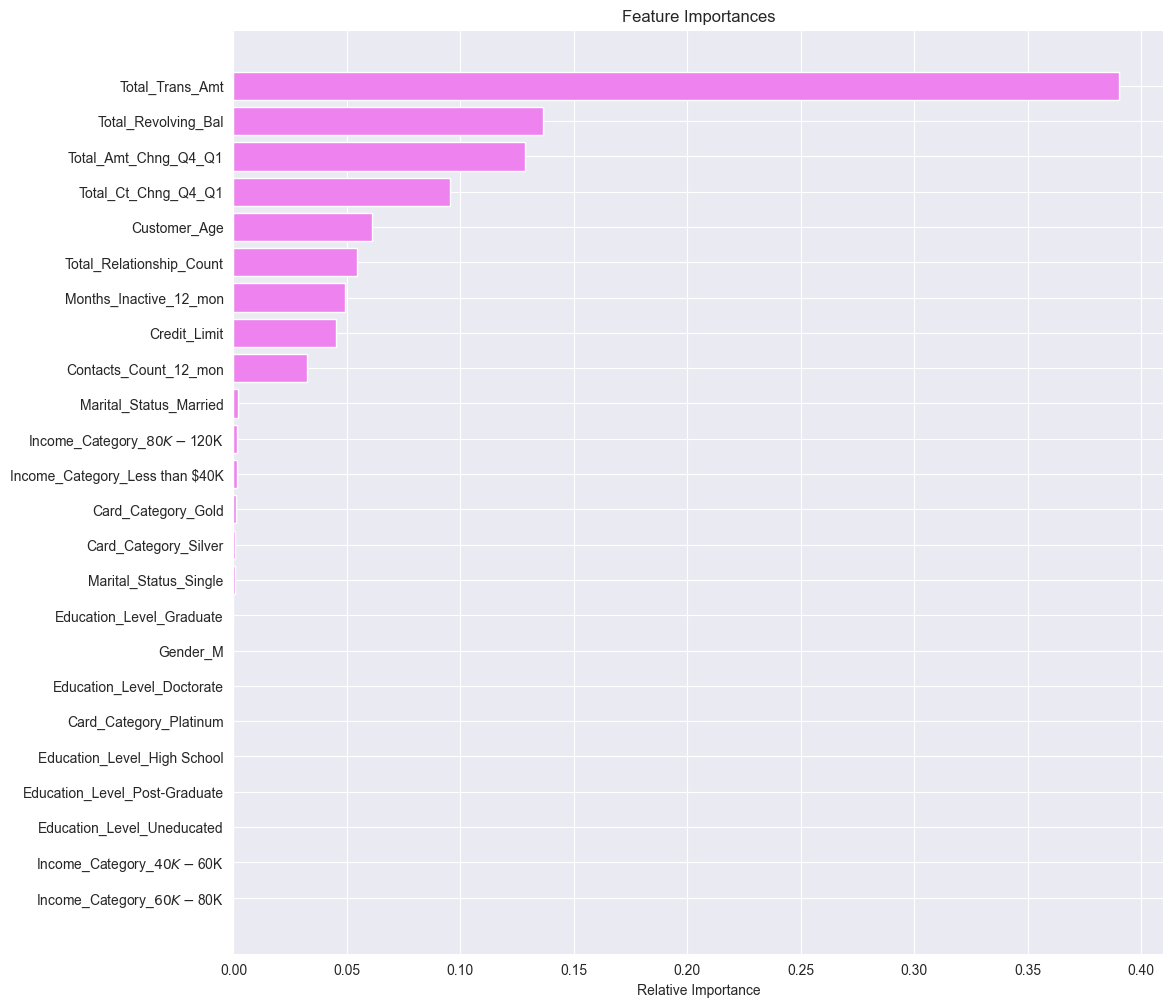

In [118]:
feature_names = X_train.columns
importances = (
    tuned_adb_un.feature_importances_
)  ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

***

Important features to understand customer credit card churn, are
Total Transaction Amount
Total Revolving Balance
Total Amount Change Q4 to Q1
Total Count Change Q4 to Q1
 
These features are negatively correlated with the Attrition Flag, the lower the values of these features, the higher the chances of a customer to attrite
 
Schemes to increase credit card usage will increse Total Transaction amount , that reduces Attrtion Risk 

Offer credit limit increase for the customers who are regularly using the credit card. This should increase the credit card spends/transaction amounts and reduce Attrition Risk

Offer cashback to incresae Total Spend and that reduces Attrition

More different types of Credit cards will lead to more relationship count (Total Relationship Count) with the csutomer, which reduces Attrition Risk.

Whenver we have High Contact Counts in last 12 months - attrition risk increases. Immediate intervention necessary when we see contact count increasing. Great time to reach out and correct the scenario.



With our model, we can predict which customers are likely to attrite, and according to the prediction we can reach out to discuss credit card offers, credit limit increase etc, to try retain those customers.